<a href="https://colab.research.google.com/github/Esfro/Tutoria_1/blob/main/Monty_Hall_(plt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

N = 3000 # Cantidad de simulaciones

no_change = 0 # Cantidad de veces que me llevo el auto sin cambiar de puerta
change = 0 # Cantidad de veces que me llevo el auto cambiando de puerta
rand_sel = 0 # Cantidad de veces que me llevo el auto eligiendo al azar entre las dos puertas restantes

Numero_de_tiradas = 0

a = int(N/3)
b = int(a * 2)

# Hits acumulados
change_acum = [] 
no_change_acum = []
rand_sel_acum = []

for i in range(N):

    Numero_de_tiradas = Numero_de_tiradas + 1

    R=np.array(random.sample(range(0, 3), 3) ) #0 es el auto
    Cambio = bool(random.getrandbits(1))
    Puerta = random.randrange(0,3)
    Premio =int(np.where(R == 0)[0])
    Puerta_Abierta = np.where((R != R[Puerta]) & (R != R[Premio]))[0]
    Otra_Puerta = R[(R != Puerta) & (R != Puerta_Abierta[0])]

    if i >= b:
        if Cambio == True: Puerta = Otra_Puerta[0]   
    elif i >= a:
        Cambio = False
    elif i >= 0:
        Cambio = True

    if Cambio == True: Puerta = Otra_Puerta[0]   

    if int(Premio) == int(Puerta): 
        if i >= b:
            rand_sel += 1
            #rand_sel_acum.append(rand_sel)
        elif i >= a:
            no_change += 1
            #no_change_acum.append(no_change)
        elif i >= 0:
            change += 1
            #change_acum.append(change)
            
    no_change_acum.append(no_change)
    change_acum.append(change)
    rand_sel_acum.append(rand_sel)

no_change, change, rand_sel, Numero_de_tiradas

(311, 684, 503, 3000)

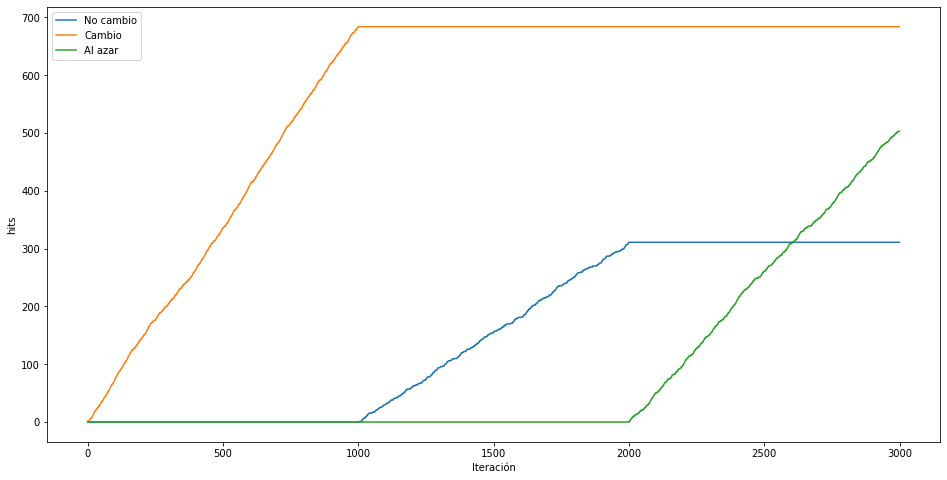

In [3]:
plt.figure(figsize=(16,8))
plt.plot(no_change_acum, label='No cambio')
plt.plot(change_acum, label='Cambio')
plt.plot(rand_sel_acum, label='Al azar')
plt.xlabel('Iteración')
plt.ylabel('hits')
plt.legend()
plt.show()